![alt text](img3.png "Mean NBA Salary Over Time")
<div style="text-align: center;">
            
<h1> Why are Centers paid the most? </h1>
<h2>A Basketball Analysis</h2>

<h4>Authors: Perri Smith, Srivats Narasimhan, Nisarg Joshi</h4>

</div>

***

<h1 style="text-align: center;">Introduction<h1>  


Basketball is one of most popular sports in the world. One of the many fascinating sides to the game is how rich basketball is with numerous statistics that provide many invaluable insights into player and team performances. The NBA is known for providing incredible compensations to players, rightfully so. As data scientists, our objective for this project was to take a closer look at to what degree various player performance statistics play a role in indicating their respective salaries. 

A recent phenomenon within the NBA, particularly since 2015, shows a steep increase in the salaries of centers, out of all the other positions on the court. This is particularly interesting, as recently basketball has also changed to become more “position-less”; players are more versatile than ever with their primary objective being to maximize field goals, taking on multiple roles rather than strictly duties traditionally associated with their position. 

Because of this, concern about particular player statistics being more or less relevant towards particular positions is more negligible. Instead, they can be more indicative of all players. Consequently, for the purposes of focus and simplicity, we will be looking at basketball players who only play as centers and their respective salaries and stats; this should provide us a big picture extending to the relationship between compensation and stats for all NBA players in general. 


We will be using Python, along with its associated data analysis libraries, Pandas and Numpy, to start our analysis. Our dataset is composed of NBA player data from the 2017-2018 season, listing the players, their position, some demographic information, and a lot of different statistics. 

![alt text](img2.png "Mean NBA Salary Over Time")
Source: http://harvardsportsanalysis.org/2018/10/wanna-make-money-in-the-nba-be-a-center/

***

<h1 style="text-align: center;">Data Collection and Processing<h1>

<big>Our projected was completed using Python 3 and the following Python libraries: </big>

In [376]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

%matplotlib inline

<big>We aquired our data from the following source:</big>

https://www.kaggle.com/meicher/201718-advanced-player-metrics-salary

In [377]:
data = pd.read_csv("data.csv", encoding = "ISO-8859-1")
data.head()

,Player,NBA_Country,NBA_DraftNumber,Salary,Signed Using,Guaranteed,Pos,Age,Tm,G,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Zhou Qi,China,43,"$815,615",MLE,"$815,615",C,22,HOU,16,...,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2
1,Zaza Pachulia,Georgia,42,"$3,477,600",NaN,"$3,477,600",C,33,GSW,66,...,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7
2,Zach Randolph,USA,19,"$12,307,692",Cap space,"$24,000,000",PF,36,SAC,59,...,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0
3,Zach LaVine,USA,13,"$3,202,217",1st Round Pick,"$3,202,217",SG,22,CHI,24,...,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1
4,Zach Collins,USA,10,"$3,057,240",1st Round Pick,"$6,686,160",C,20,POR,62,...,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2


## Tidying our Data

In [378]:
data['Salary'].dtype.kind

'O'

### We can see above that the type of our <u>Salary</u> column is type <i>Object</i>. This will cause issues when trying to graph numerically. Let's change this to a float.

In [379]:
data['Salary'] = data[data.columns[3]].replace('[\$,]', '', regex=True).astype(float)
data.head()

,Player,NBA_Country,NBA_DraftNumber,Salary,Signed Using,Guaranteed,Pos,Age,Tm,G,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Zhou Qi,China,43,815615.0,MLE,"$815,615",C,22,HOU,16,...,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2
1,Zaza Pachulia,Georgia,42,3477600.0,NaN,"$3,477,600",C,33,GSW,66,...,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7
2,Zach Randolph,USA,19,12307692.0,Cap space,"$24,000,000",PF,36,SAC,59,...,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0
3,Zach LaVine,USA,13,3202217.0,1st Round Pick,"$3,202,217",SG,22,CHI,24,...,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1
4,Zach Collins,USA,10,3057240.0,1st Round Pick,"$6,686,160",C,20,POR,62,...,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2


### Drop all columns that we will not need.

In [380]:
df = data[['Player','Salary','Pos', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'OWS', 'DWS']]
df.head()

,Player,Salary,Pos,PER,TS%,3PAr,FTr,ORB%,DRB%,AST%,STL%,BLK%,TOV%,OWS,DWS
0,Zhou Qi,815615.0,C,0.6,0.303,0.593,0.370,6.5,16.8,1.5,1.1,6.8,18.2,-0.4,0.1
1,Zaza Pachulia,3477600.0,C,16.8,0.608,0.004,0.337,11.0,25.0,15.4,1.9,1.3,19.3,1.7,1.4
2,Zach Randolph,12307692.0,PF,17.3,0.529,0.193,0.140,7.0,23.8,14.9,1.4,0.6,12.5,0.3,1.1
3,Zach LaVine,3202217.0,SG,14.6,0.499,0.346,0.301,1.4,14.4,18.6,1.8,0.5,9.7,-0.1,0.5
4,Zach Collins,3057240.0,C,8.2,0.487,0.387,0.146,4.9,18.3,7.3,0.8,2.5,15.6,-0.4,1.2


What do these stats mean? 

Terms defined: (EXPLAIN IN MORE DETAIL)

Player efficiency rate - aggregate 

True shooting percentage - shooting efficiency (includes field goal stats) 

3PAr - 3 point field goal percentage 

FTr - Free throw percentage 

ORB - Offensive rebound percentage percentage of offensive rebounds in game attributed to player)

DRB - Defensive rebound percentage (percentage of defensive rebounds in game attributed to player)

AST - Assist Percentage 

STL - Steal Percentage 

BLK - Block percentage

TOV - Turnover percentage (losing possession - bad!) 

OWS - Offensive win shares 

DWS - Defensive win shares 

https://www.basketball-reference.com/about/glossary.html

### We filter the data to only include centers.

In [381]:
df = df[df.Pos == 'C'].reset_index(drop=True)
df.head()


#TO DO: GET RID OF DUPLICATE PLAYERS?

,Player,Salary,Pos,PER,TS%,3PAr,FTr,ORB%,DRB%,AST%,STL%,BLK%,TOV%,OWS,DWS
0,Zhou Qi,815615.0,C,0.6,0.303,0.593,0.370,6.5,16.8,1.5,1.1,6.8,18.2,-0.4,0.1
1,Zaza Pachulia,3477600.0,C,16.8,0.608,0.004,0.337,11.0,25.0,15.4,1.9,1.3,19.3,1.7,1.4
2,Zach Collins,3057240.0,C,8.2,0.487,0.387,0.146,4.9,18.3,7.3,0.8,2.5,15.6,-0.4,1.2
3,Willy Hernangomez,1435750.0,C,20.6,0.592,0.075,0.555,13.6,25.2,11.0,1.8,2.8,15.4,0.8,0.6
4,Willy Hernangomez,1435750.0,C,25.0,0.589,0.092,0.815,17.2,29.8,7.1,2.0,3.0,7.3,0.7,0.3


***

<h1 style="text-align: center;">Exploratory Analysis & Data Visualization<h1>

Let's take a look at the distribution of player salaries:

In [382]:
#TO DO: Histogram of salary distribution

First, we will standardize the player salaries to have an easier basis for comparison. Then, we add a column consisting of those values to our dataframe: 

In [383]:
std_salaries = []
salaries = df['Salary']


avg_salary = salaries.mean()
std = np.std(salaries.values)

for index, value in salaries.items():
    standard = (value - avg_salary)/std
    std_salaries.append(standard)


df = pd.concat([df, pd.Series(std_salaries, name="std_salary")], axis=1)
df.head()

,Player,Salary,Pos,PER,TS%,3PAr,FTr,ORB%,DRB%,AST%,STL%,BLK%,TOV%,OWS,DWS,std_salary
0,Zhou Qi,815615.0,C,0.6,0.303,0.593,0.370,6.5,16.8,1.5,1.1,6.8,18.2,-0.4,0.1,-0.921983
1,Zaza Pachulia,3477600.0,C,16.8,0.608,0.004,0.337,11.0,25.0,15.4,1.9,1.3,19.3,1.7,1.4,-0.556013
2,Zach Collins,3057240.0,C,8.2,0.487,0.387,0.146,4.9,18.3,7.3,0.8,2.5,15.6,-0.4,1.2,-0.613804
3,Willy Hernangomez,1435750.0,C,20.6,0.592,0.075,0.555,13.6,25.2,11.0,1.8,2.8,15.4,0.8,0.6,-0.836727
4,Willy Hernangomez,1435750.0,C,25.0,0.589,0.092,0.815,17.2,29.8,7.1,2.0,3.0,7.3,0.7,0.3,-0.836727


We will first try plotting the standardized salary against the player efficiency rate (PER) statistic. This statistic is an aggregrate of many player stats to provide a comprehensive picture of performance. For instance, one of the things the formula takes into account is providing positive points for offensive rebounds, while subtracting points for negatives like a higher turnover percentage. Overall, a higher PER tends to indicate a better player. 

Don't forget to standardize the PER as well:

### CENTERS - Player efficiency rating vs salary

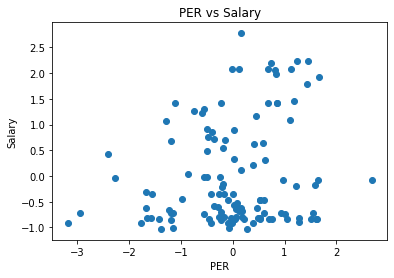

In [384]:
#Standardize x axis

std_per = []
per = df['PER']


avg_per = per.mean()
std = np.std(per.values)

for index, value in per.items():
    standard = (value - avg_per)/std
    std_per.append(standard)


df = pd.concat([df, pd.Series(std_per, name="std_PER")], axis=1)
df.head()


#Plot

plt.scatter('std_PER', 'std_salary', data = df)
plt.xlabel('PER')
plt.ylabel('Salary')
plt.title('PER vs Salary')
plt.show()

Observing the scatterplot, we can see somewhat of a positive trend in salary as PER increases towards average and slightly above average up till about one standard deviation above the mean. However, there is still a lot of noise we can see, particularly around the bottom of the plot. Let's add a line of best fit with using our regression library:

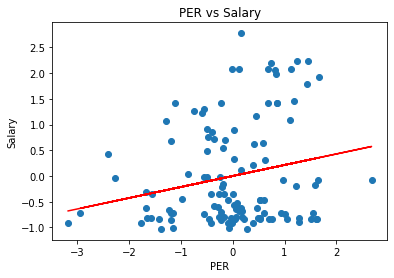

In [385]:
model = LinearRegression()

model.fit(df['std_PER'].values.reshape(-1, 1), df['std_salary'].values)

plt.scatter('std_PER', 'std_salary', data = df)
plt.xlabel('PER')
plt.ylabel('Salary')
plt.title('PER vs Salary')

plt.plot(df['std_PER'].values.reshape(-1, 1), model.predict(df['std_PER'].values.reshape(-1, 1)),color='r')

plt.show()

The regression line is indeed positive! Let's find out more about the model parameters to help our analysis. To do this, we use the statsmodels and scipy libraries: 

In [386]:
Y = df['std_salary']
X = df['std_PER']
X = sm.add_constant(X)
model2 = sm.OLS(Y,X)
results = model2.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             std_salary   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     5.664
Date:                Sun, 15 Dec 2019   Prob (F-statistic):             0.0189
Time:                        19:02:04   Log-Likelihood:                -167.46
No. Observations:                 120   AIC:                             338.9
Df Residuals:                     118   BIC:                             344.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.816e-17      0.090  -4.24e-16      1.0

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Let's take a moment to analyze what this all means. First of all, the "coef" for  "const" within the table indicates the y-intercept of the line, while the "coef" for "x1" indicates the slope of the line, also interpreted as the correlation coefficeint. As we noticed from the positive regression line, the slope is indeed a positive value: 0.2140. This generally indicates a noticeable, albeit weak correlation. This can probably be attributed to the many other data points, especially around the bottom of the plot that don't necessarily contribute to the positive trend, and lead to higher residuals.

Another valuable statistic that we should note when it comes to analyzing our data is the p-value. A p-value provides insight into whether to lean towards accepting or rejecting the null hypothesis. The null hypothesis is simply a fancy way to describe whether the relationship between our two datasets is simply the way it is due to randomness (accepting the null hypothesis), or whether there could be a legitimate underlying cause behind the relationship (rejecting the null hypothesis). In our case, rejecting the null hypothesis would entail implying that NBA players with a higher PER indeed are compensated with higher salaries. 

We can find the p-value by looking at the "P>|t|" column value for x1. The value 0.019 is below 0.05, which is usually seen as evidence that contradicts the null hypothesis. This provides us with further insight into the fact that players with higher PER's may indeed be compensated more generously! 


However, we don't want to stop here. We're trying to come up with a potential metric that's as accurate as possible in indicating a relationship between stats and salary. Although the PER is a standard in the industry to measure overall player performance, it isn't without its shortcomings. Many have criticized the formula for not taking a player's defensive ability on the court into account as much as it should. Therefore, we would like to come up with a scoring that includes the PER, but also includes more defense-based statistics to incorporate within the regression. To accomplish this, we'll need to use a multiple linear regression. 




First, let's examine / regress on a couple relationships amongst the various defensive-oriented player stats and salary. Make sure to standardize the defensive stats!

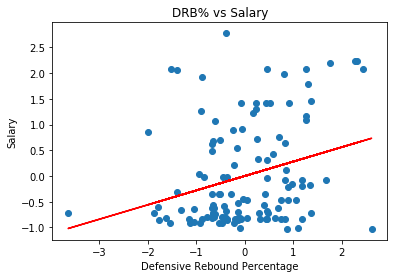

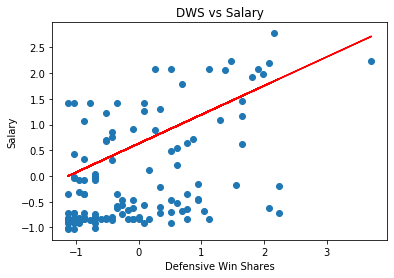

In [387]:
std_drb = []
drb = df['DRB%']

avg_drb = drb.mean()
std = np.std(drb.values)

for index, value in drb.items():
    standard = (value - avg_drb)/std
    std_drb.append(standard)
    
    
std_dws = []
dws = df['DWS']

avg_dws = dws.mean()
std = np.std(dws.values)

for index, value in dws.items():
    standard = (value - avg_dws)/std
    std_dws.append(standard)


df = pd.concat([df, pd.Series(std_drb, name="std_DRB")], axis=1)
df = pd.concat([df, pd.Series(std_dws, name="std_DWS")], axis=1)



plt.scatter('std_DRB', 'std_salary', data = df)
plt.xlabel('Defensive Rebound Percentage')
plt.ylabel('Salary')
plt.title('DRB% vs Salary')

model.fit(df['std_DRB'].values.reshape(-1, 1), df['std_salary'].values)
plt.plot(df['std_DRB'].values.reshape(-1, 1), model.predict(df['std_DRB'].values.reshape(-1, 1)),color='r')

plt.show()

plt.scatter('std_DWS', 'std_salary', data = df)
plt.xlabel('Defensive Win Shares')
plt.ylabel('Salary')
plt.title('DWS vs Salary')

model.fit(df['std_DWS'].values.reshape(-1, 1), df['std_salary'].values)
plt.plot(df['std_DWS'].values.reshape(-1, 1), model.predict(df['DWS'].values.reshape(-1, 1)),color='r')

plt.show()

We observe that there are noticeable positive relationships amongst defensive rebound percentages and win shares compared to player salary. This can defintely add to the strength of our overall model. To build our multiple linear regression, all it entails is having multiple independent variables: in this case, defensive win shares and rebound percentages in addition to the PER, in a relation with our dependent variable, player salary. We accomplish this using the statsmodels library again. 

                            OLS Regression Results                            
Dep. Variable:             std_salary   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     12.81
Date:                Sun, 15 Dec 2019   Prob (F-statistic):           2.73e-07
Time:                        19:02:04   Log-Likelihood:                -153.10
No. Observations:                 120   AIC:                             314.2
Df Residuals:                     116   BIC:                             325.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.816e-17      0.080  -4.74e-16      1.0

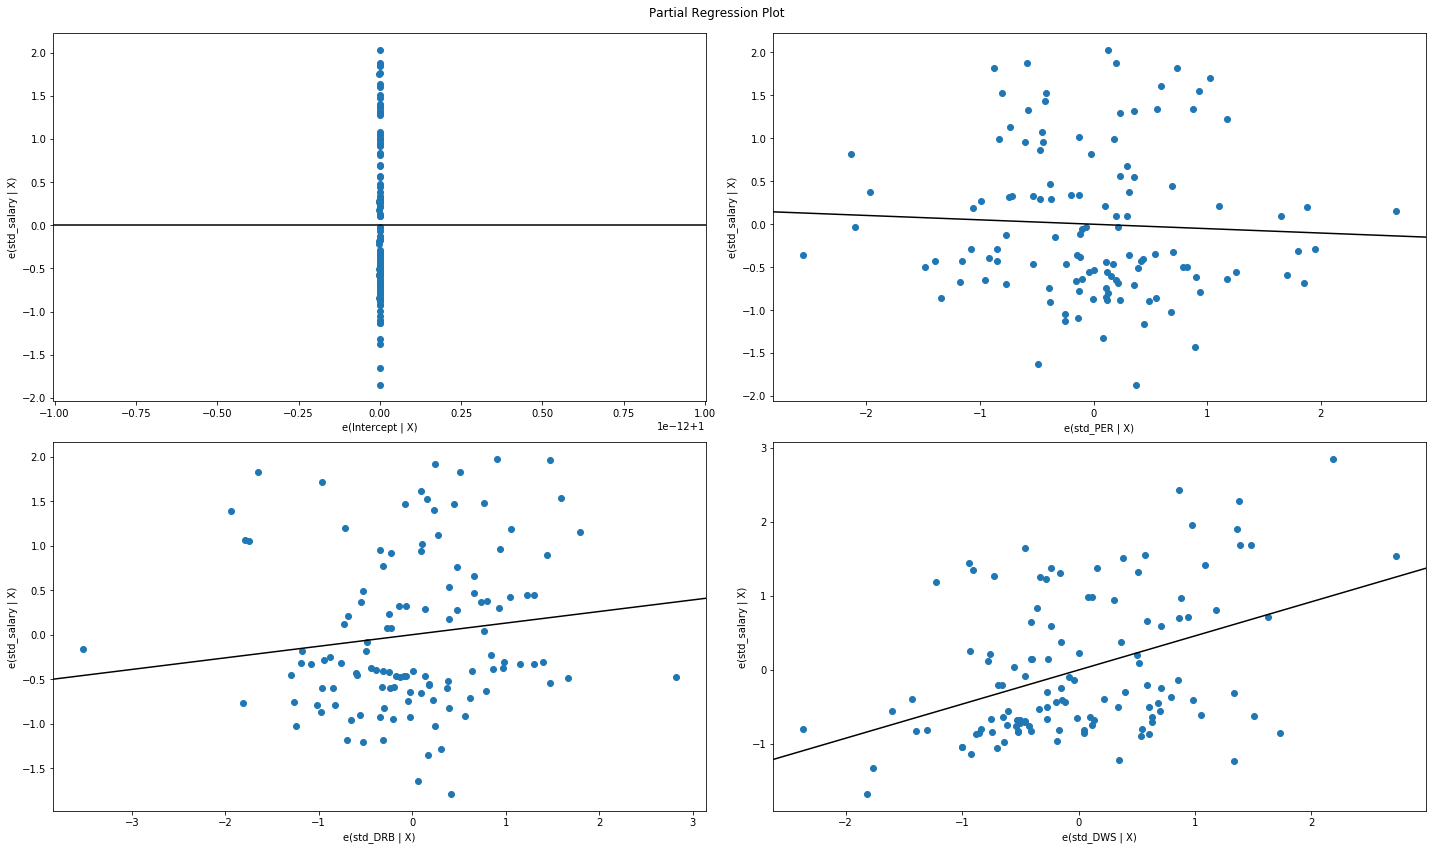

In [388]:
import statsmodels.formula.api as fitter
res = fitter.ols(formula='std_salary ~ std_PER + std_DRB + std_DWS', data=df).fit()
print(res.summary())

fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(res, fig=fig)

#TO DO: PLAY AROUND WITH / INCORPORATE MORE STATS FOR A BETTER MODEL! 

Our multiple regession model has given us a lot more insight into the relationship between player stats and salary. After incorporating more of the defensive stats, we can see that the player efficiency rate isn't necessarily as indicative of salary as our simple regression model originally suggested. Relative to the defensive stats, the positive trend is nowhere to be soon, as seen in the graph for PER above. On the other hand, the defensive stats, particular defensive win shares, do a much better job indicating the positive relationship with player salary. This can be seen in the graphs, as well as the higher slope / correlation coefficients in the table. The p-values are also even smaller for the defensive stats, implying a contradiction with the null hypothesis, as opposed to the p-value for PER which is around 0.5, making it ambiguous. 


With this data, we now know that in our scoring, although PER may provide a minimal amount of insight and is a standard within the NBA, giving a greater weight to the defensive stats we have taken a look at should account for a more accurate model.

Let's construct a new score that aggregates these independent variables with different weights, and then construct a regression model using that against salary to see if we have come up with a better indicator. 

In [389]:
#TO DO: CREATE SCORE THAT WEIGHTS VARIABLES (ex. 0.2*std_PER + 0.3*std_DRB + 0.5*std_DWS), add column to dataframe
#regress against salary....hopefully stronger correlation! 

***

<h1 style="text-align: center;">Analysis & ML<h1>

Explain here the importance of splitting dataset into training / testing sets so that we're not overfitting! Once that's done do all the regression stuff again and we'll be good for the machine learning part :) 

GREAT LINK FOR REFRENCE: https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

In [390]:
#x = positions_df['C']['PER']
#y = positions_df['C']['Salary']

#X_train, X_test, y_train, y_test = train_test_split(x, y)

#clf = LinearRegression()
#clf.fit(X_train, y_train)

#predicted = clf.predict(X_test)
#expected = y_test

***

<h1 style="text-align: center;">Conclusion<h1>

Other valuable links I consulted: 

https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/

https://datatofish.com/multiple-linear-regression-python/

https://towardsdatascience.com/simple-and-multiple-linear-regression-with-python-c9ab422ec29c

http://www.chicagonow.com/bullsville/2013/09/the-bulls-per-and-the-idiots-who-live-by-it/